In [177]:
#D831FF is T20 (216,49,255)
#00129A is T19 (0,18,154)
#3580BB is D12 (53,128,187)
import cv2
import random
import os
import numpy as np
import time
import matplotlib.pyplot as plt

board = cv2.imread("board.png")
board = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)

def NineDarter(sd=25):
    nine_darter = False
    loops = 1000000
    board_col = cv2.imread("board_col.png")
    board_col = cv2.cvtColor(board_col, cv2.COLOR_BGR2RGB)
    board = cv2.imread("board.png")
    board = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)
    T20 = np.array([216,49,255])
    T19 = np.array([0,18,154])
    D12 = np.array([53,128,187])
    T20_x_shots = []
    T20_y_shots = []
    T19_x_shots = []
    T19_y_shots = []
    D12_x_shots = []
    D12_y_shots = []
    nine_darted = False
    i = 1

    x, y = np.where(np.all(board_col == T20, axis=-1)==True)
    T20_avg = (int(round(np.mean(y),0)),int(round(np.mean(x),0)))

    x, y = np.where(np.all(board_col == T19, axis=-1)==True)
    T19_avg = (int(round(np.mean(y),0)),int(round(np.mean(x),0)))

    x, y = np.where(np.all(board_col == D12, axis=-1)==True)
    D12_avg = (int(round(np.mean(y),0)),int(round(np.mean(x),0)))

    start=time.time()

    while not nine_darted:
        for j in range(9):
            if j <= 6:
                x = min(int(round(np.random.normal(T20_avg[1],sd),0)),920)
                y = min(int(round(np.random.normal(T20_avg[0],sd),0)),920)
                T20_x_shots.append(y)
                T20_y_shots.append(x)
                if np.array_equal(board_col[x][y],T20):
                    shots.append((x,y))
                    continue
                else:
                    shots=[]
                    break
            if j == 7:
                x = min(int(round(np.random.normal(T19_avg[1],sd),0)),920)
                y = min(int(round(np.random.normal(T19_avg[0],sd),0)),920)
                T19_x_shots.append(y)
                T19_y_shots.append(x)
                if np.array_equal(board_col[x][y],T19):
                    shots.append((x,y))
                    continue
                else:
                    shots=[]
                    break
            else:
                x = min(int(round(np.random.normal(D12_avg[1],3),sd)),920)
                y = min(int(round(np.random.normal(D12_avg[0],3),sd)),920)
                D12_x_shots.append(y)
                D12_y_shots.append(x)
                shots.append((x,y))
                if np.array_equal(board_col[x][y],D12):
                    nine_darted = True
                else:
                    break 
        i += 1

    diff=time.time()-start
    return i, diff

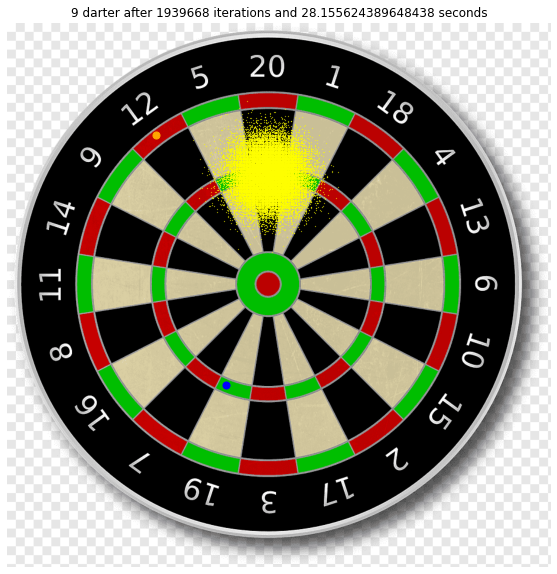

In [180]:
imgplot = plt.imshow(board)
i, diff = NineDarter(30)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(T20_x_shots,T20_y_shots, c='yellow',s=0.05)
plt.scatter(T19_x_shots,T19_y_shots, c='blue',s=50)
plt.scatter(D12_x_shots,D12_y_shots, c='orange',s=50)
plt.axis('off')
plt.title("9 darter after {0} iterations and {1} seconds".format(i,diff))
plt.show()